In [1]:
import pandas as pd
import numpy as np
from keras.datasets import mnist,cifar10
import tensorflow as tf
from keras.layers import Conv2D,AveragePooling2D,Flatten,Dense,GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from tensorflow.keras.applications import ResNet50

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
model_resnet_50 = Sequential()
model_resnet_50.add(ResNet50(include_top=False,weights="imagenet",input_tensor=None,input_shape=(32,32,3),pooling='avg',classes=10))

model_resnet_50.add(Flatten())

model_resnet_50.add(Dense(units=1024, activation='relu'))

model_resnet_50.add(Dense(units=512, activation='relu'))

model_resnet_50.add(Dense(units=10, activation='softmax'))


94765736/94765736 [==============================] - 5s 0us/step


In [6]:
model_resnet_50.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model_resnet_50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 26,215,818
Trainable params: 26,162,698
Non-trainable params: 53,120
_________________________________________________________________


In [8]:
model_resnet_50.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
391/391 [==============================] - 43s 69ms/step - loss: 1.0568 - accuracy: 0.6514 - val_loss: 1.3828 - val_accuracy: 0.6460
Epoch 2/20
391/391 [==============================] - 25s 63ms/step - loss: 0.6745 - accuracy: 0.7786 - val_loss: 1.0082 - val_accuracy: 0.6825
Epoch 3/20
391/391 [==============================] - 25s 65ms/step - loss: 0.5518 - accuracy: 0.8157 - val_loss: 0.9160 - val_accuracy: 0.7100
Epoch 4/20
391/391 [==============================] - 25s 64ms/step - loss: 0.4712 - accuracy: 0.8456 - val_loss: 0.9689 - val_accuracy: 0.7100
Epoch 5/20
391/391 [==============================] - 25s 64ms/step - loss: 0.3833 - accuracy: 0.8724 - val_loss: 1.0254 - val_accuracy: 0.7115
Epoch 6/20
391/391 [==============================] - 25s 64ms/step - loss: 0.3230 - accuracy: 0.8933 - val_loss: 0.7873 - val_accuracy: 0.7752
Epoch 7/20
391/391 [==============================] - 26s 67ms/step - loss: 0.2810 - accuracy: 0.9066 - val_loss: 0.7771 - val_accuracy:

In [9]:
loss, accuracy = model_resnet_50.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 3s 14ms/step - loss: 1.4117 - accuracy: 0.6952


In [10]:
Actual = np.argmax(model_resnet_50.predict(x_test),axis=1)
Actual

313/313 [==============================] - 5s 11ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [11]:
for i in range(len(y_test)):
  print("X = %s, Predicted = %s" % (y_test[i], Actual[i]))

Streaming output truncated to the last 5000 lines.
X = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], Predicted = 7
X = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Predicted = 6
X = [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], Predicted = 9
X = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], Predicted = 4
X = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], Predicted = 2
X = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], Predicted = 3
X = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], Predicted = 4
X = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], Predicted = 3
X = [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], Predicted = 4
X = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], Predicted = 7
X = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], Predicted = 7
X = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.], Predicted = 3
X = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Predicted = 6
X = [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Predicted = 3
X = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], Predicted = 7
X = [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.], Predicted = 2
X = [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], Predicted = 3
X = [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.], Predicted = 3
X = [0. 0. 0. 0. 1. 0. 0. 0. 0.

In [12]:
k = y_test.tolist()
pred_1 = []
for i in range(len(k)):
    if 1 in k[i]:
        pred_1.append(k[i].index(1))

In [13]:
cm = confusion_matrix(pred_1, Actual)
print('Confusion Matrix\n')
print(cm)

Confusion Matrix

[[603   8 102 155  28   3   4  11  48  38]
 [ 24 734   4  14   2   0   7   4  23 188]
 [ 13   3 610 181  68  18  56  23   7  21]
 [  6   1  33 810  50  12  36  22   9  21]
 [ 11   1  65 142 679  13  23  56   6   4]
 [  3   1  52 499  70 243  44  56  11  21]
 [  2   3  15 120  31   1 809   7   1  11]
 [  8   5  19 107  33  29   9 772   1  17]
 [ 47  18  10  48   8   0   6   1 805  57]
 [ 39  17   3  30   2   0   1   4  17 887]]


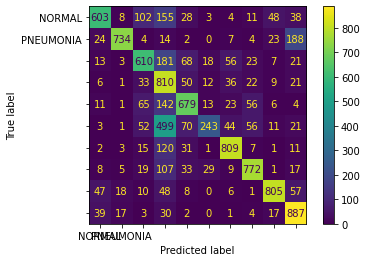

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NORMAL','PNEUMONIA'])

disp = disp.plot()

plt.show()